## Question 4b: Graph of Region E

In [1]:
x, y, z = var("x, y, z")

curve_plot = implicit_plot3d(z==4-x^2, (x, -1, 3), (y, -1, 3), (z, -1, 5), plot_points = 200, region = lambda x, y, z: 0 <= z <= 4-x^2 and 0 <= y <= x, alpha = 0.5)

side_1_plot = implicit_plot3d(z==0, (x, -1, 3), (y, -1, 3), (z, -1, 5), plot_points = 50, region = lambda x, y, z: 0 <= z <= 4-x^2 and 0 <= y <= x, alpha = 0.5)
side_2_plot = implicit_plot3d(y==0, (x, -1, 3), (y, -1, 3), (z, -1, 5), plot_points = 100, region = lambda x, y, z: 0 <= z <= 4-x^2 and 0 <= y <= x, alpha = 0.5)
side_3_plot = implicit_plot3d(y==x, (x, -1, 3), (y, -1, 3), (z, -1, 5), plot_points = 100, region = lambda x, y, z: 0 <= z <= 4-x^2 and 0 <= y <= x, alpha = 0.5)

solid_plot = curve_plot + side_1_plot + side_2_plot + side_3_plot
solid_plot

Graphics3d Object

## Question 5: Euler Approximation

### Step Number, n = 2
### Step Size, h = 12/n = 6 month

number of iterations: 2
total final time elapsed: 12
final estimation: 1272.00000000000

Approximate Values: 
[[0, 0], [6, 600], [12, 1272.00000000000]]

Actual Values: 
[[0, 0.000000000000000], [6, 600.000000000000], [12, 1212.00000000000]]


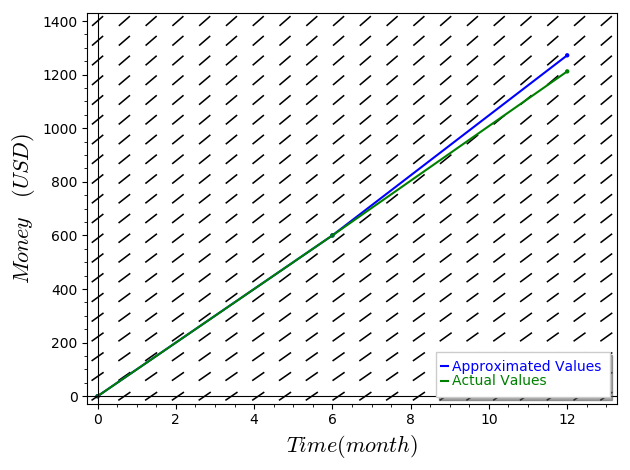

In [2]:

# Define data structure for graphing
points = []

# Define variables
t = var('t') # time measured in months
y = var('y') # corresponding value to function

r = .02 # r is the interest rate (compounded continuously)
q(t) = 100 # rate of saving/spending (dollars/month)

# Define the function
m(t, y) = r*y + q(t)

# Step 1: Define step size (h), the change in distance from the initial value on the x-axis to the next value on the x-axis that we are trying to approximate, and number of steps (n).
n = 2  # define n, the number of steps 
h = 12/n # define h, the step size: increments in time : 12 months per year / number of steps


# Step 2: Identify initial t0 and  y0 values (initial starting point on the function), as found or given.
t_0 = 0 # define initial starting x : 0 months
y_0 = 0 # define initial corresponding starting y : 0 dollars
points.append([t_0, y_0])

# Step 6: Repeat Steps 3 - 5 n times...
i = 0 # define number of iterations
for i in range (n):  
    # Step 3: Compute the derivative value dy/dt at the initial point (t0, y0) to obtain the “slope:” f(t0, y0).
    # m = g.diff(t_0) # define dy/dx (the slope)
    m_0 = m(t_0, y_0) # define dy/dx (the slope) to be the differential equation ry + q(t) : the rate of change of money in a checking account
    # Step 4: Multiply the value from Step 3 (the “slope” or f(t0, y0) or dydt) by the step size (h) to get the total distance travelled in the y direction.
    # Step 5:  Add this total distance to the initial value outcome (y0) to get your new y-value. In other words, calculate the approximate y-value of a close-by point (y1=y(t1)=y(t0+h)) near the initial point (y0) using the following formula: y1=y0+f(t0,y0) h.
    outcome = m_0*h + y_0
    # Step 6: ... each time updating/redefining the initial point (t0,y0) to be the initial value plus the step size (“new”t0= t0+h) and the outcome value computed in Step 3  (“new” y0= y1).
    t_0 = t_0 + h
    y_0 = outcome
    points.append([t_0, y_0])

# Step 7: Output the final value (after the n iterations in Step 6): this is yn.
print "number of iterations:", i+1
print "total final time elapsed:", t_0
print "final estimation:", y_0



# Output our approximations
print '\nApproximate Values: \n', points


# Compare approximations with the actual solution
t_points = []

t_0 = 0
y_0 = 0

for i in range (n+1):
    y_1 = 0.02*y_0 + 100*t_0
    t_points.append([t_0, y_1])
    t_0 = t_0 + h
    y_0 = y_1

print '\nActual Values: \n', t_points # actual solutions

from sage.plot.line import Line

# Graph the slope field for the function
g_plot = plot_slope_field(m, (t, 0, 13), (y, 0, 1400), axes_labels = ["$Time(month)$","$Money\quad(USD)$"])
line = line2d(points, legend_label='Approximated Values', legend_color = 'blue', thickness=1.5)
line_t = line2d(t_points, color = 'green', legend_label='Actual Values', legend_color = 'green', thickness=1.5)
line.set_legend_options(loc = 'lower right')

# Plot the points obtained from algorithm
(g_plot + point(points,size=10) + point(t_points, color = "green", size=10) + line + line_t)

In [3]:
# Calculate the error
errors = []
r_errors = []

for i in range(len(points)):
    error = points[i][1] - t_points[i][1]
    r_error = error/points[i][1]
    errors.append(error)
    r_errors.append(r_error)

print "\nerrors:", errors
print "\nrelative errors:", r_errors


errors: [0.000000000000000, 0.000000000000000, 60.0000000000000]

relative errors: [NaN, 0.000000000000000, 0.0471698113207547]


### Step Number, n = 12
### Step Size, h = 12/12 = 1 month

number of iterations: 12
total final time elapsed: 12
final estimation: 1341.20897281273

Approximate Values: 
[[0, 0], [1, 100], [2, 202.000000000000], [3, 306.040000000000], [4, 412.160800000000], [5, 520.404016000000], [6, 630.812096320000], [7, 743.428338246400], [8, 858.296905011328], [9, 975.462843111554], [10, 1094.97209997379], [11, 1216.87154197326], [12, 1341.20897281273]]

Actual Values: 
[[0, 0.000000000000000], [1, 100.000000000000], [2, 202.000000000000], [3, 304.040000000000], [4, 406.080800000000], [5, 508.121616000000], [6, 610.162432320000], [7, 712.203248646400], [8, 814.244064972928], [9, 916.284881299459], [10, 1018.32569762599], [11, 1120.36651395252], [12, 1222.40733027905]]


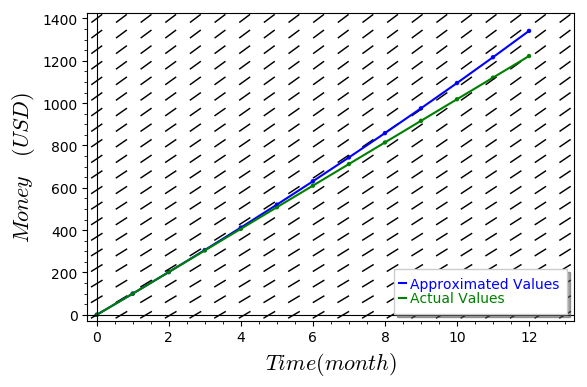

In [4]:

# Define data structure for graphing
points = []

# Define variables
t = var('t') # time measured in months
y = var('y') # corresponding value to function

r = .02 # r is the interest rate (compounded continuously)
q(t) = 100 # rate of saving/spending (dollars/month)

# Define the function
m(t, y) = r*y + q(t)

# Step 1: Define step size (h), the change in distance from the initial value on the x-axis to the next value on the x-axis that we are trying to approximate, and number of steps (n).
n = 12  # define n, the number of steps 
h = 12/n # define h, the step size: increments in time : 12 months per year / number of steps


# Step 2: Identify initial t0 and  y0 values (initial starting point on the function), as found or given.
t_0 = 0 # define initial starting x : 0 months
y_0 = 0 # define initial corresponding starting y : 0 dollars
points.append([t_0, y_0])

# Step 6: Repeat Steps 3 - 5 n times...
i = 0 # define number of iterations
for i in range (n):  
    # Step 3: Compute the derivative value dy/dt at the initial point (t0, y0) to obtain the “slope:” f(t0, y0).
    # m = g.diff(t_0) # define dy/dx (the slope)
    m_0 = m(t_0, y_0) # define dy/dx (the slope) to be the differential equation ry + q(t) : the rate of change of money in a checking account
    # Step 4: Multiply the value from Step 3 (the “slope” or f(t0, y0) or dydt) by the step size (h) to get the total distance travelled in the y direction.
    # Step 5:  Add this total distance to the initial value outcome (y0) to get your new y-value. In other words, calculate the approximate y-value of a close-by point (y1=y(t1)=y(t0+h)) near the initial point (y0) using the following formula: y1=y0+f(t0,y0) h.
    outcome = m_0*h + y_0
    # Step 6: ... each time updating/redefining the initial point (t0,y0) to be the initial value plus the step size (“new”t0= t0+h) and the outcome value computed in Step 3  (“new” y0= y1).
    t_0 = t_0 + h
    y_0 = outcome
    points.append([t_0, y_0])

# Step 7: Output the final value (after the n iterations in Step 6): this is yn.
print "number of iterations:", i+1
print "total final time elapsed:", t_0
print "final estimation:", y_0



# Output our approximations
print '\nApproximate Values: \n', points


# Compare approximations with the actual solution
t_points = []

t_0 = 0
y_0 = 0

for i in range (n+1):
    y_1 = 0.02*y_0 + 100*t_0
    t_points.append([t_0, y_1])
    t_0 = t_0 + h
    y_0 = y_1

print '\nActual Values: \n', t_points # actual solutions

from sage.plot.line import Line

# Graph the slope field for the function
g_plot = plot_slope_field(m, (t, 0, 13), (y, 0, 1400), axes_labels = ["$Time(month)$","$Money\quad(USD)$"])
line = line2d(points, legend_label='Approximated Values', legend_color = 'blue', thickness=1.5)
line_t = line2d(t_points, color = 'green', legend_label='Actual Values', legend_color = 'green', thickness=1.5)
line.set_legend_options(loc = 'lower right')

# Plot the points obtained from algorithm
(g_plot + point(points,size=10) + point(t_points, color = "green", size=10) + line + line_t)

In [5]:
# Calculate the error
errors = []
r_errors = []

for i in range(len(points)):
    error = points[i][1] - t_points[i][1]
    r_error = error/points[i][1]
    errors.append(error)
    r_errors.append(r_error)

print "\nerrors:", errors
print "\nrelative errors:", r_errors


errors: [0.000000000000000, 0.000000000000000, 0.000000000000000, 2.00000000000000, 6.07999999999998, 12.2823999999999, 20.6496639999999, 31.2250895999999, 44.0528400383999, 59.1779618120959, 76.6464023477964, 96.5050280207415, 118.801642533676]

relative errors: [NaN, 0.000000000000000, 0.000000000000000, 0.00653509345183636, 0.0147515241624142, 0.0236016625974692, 0.0327350476004897, 0.0420014788159054, 0.0513258754414576, 0.0606665463784644, 0.0699984979979229, 0.0793058467488280, 0.0885780254545497]


### Step Number, n = 24
### Step Size, h = 12/24 = 0.5 month

number of iterations: 24
total final time elapsed: 12
final estimation: 1348.67324265957

Approximate Values: 
[[0, 0], [1/2, 50], [1, 100.500000000000], [3/2, 151.505000000000], [2, 203.020050000000], [5/2, 255.050250500000], [3, 307.600753005000], [7/2, 360.676760535050], [4, 414.283528140401], [9/2, 468.426363421805], [5, 523.110627056023], [11/2, 578.341733326583], [6, 634.125150659849], [13/2, 690.466402166447], [7, 747.371066188112], [15/2, 804.844776849993], [8, 862.893224618493], [17/2, 921.522156864678], [9, 980.737378433324], [19/2, 1040.54475221766], [10, 1100.95019973983], [21/2, 1161.95970173723], [11, 1223.57929875460], [23/2, 1285.81509174215], [12, 1348.67324265957]]

Actual Values: 
[[0, 0.000000000000000], [1/2, 50.0000000000000], [1, 101.000000000000], [3/2, 152.020000000000], [2, 203.040400000000], [5/2, 254.060808000000], [3, 305.081216160000], [7/2, 356.101624323200], [4, 407.122032486464], [9/2, 458.142440649729], [5, 509.162848812995], [11/2, 560.183256976260], 

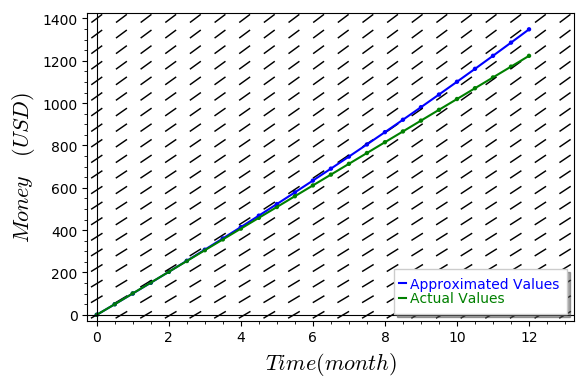

In [6]:

# Define data structure for graphing
points = []

# Define variables
t = var('t') # time measured in months
y = var('y') # corresponding value to function

r = .02 # r is the interest rate (compounded continuously)
q(t) = 100 # rate of saving/spending (dollars/month)

# Define the function
m(t, y) = r*y + q(t)

# Step 1: Define step size (h), the change in distance from the initial value on the x-axis to the next value on the x-axis that we are trying to approximate, and number of steps (n).
n = 24  # define n, the number of steps 
h = 12/n # define h, the step size: increments in time : 12 months per year / number of steps


# Step 2: Identify initial t0 and  y0 values (initial starting point on the function), as found or given.
t_0 = 0 # define initial starting x : 0 months
y_0 = 0 # define initial corresponding starting y : 0 dollars
points.append([t_0, y_0])

# Step 6: Repeat Steps 3 - 5 n times...
i = 0 # define number of iterations
for i in range (n):  
    # Step 3: Compute the derivative value dy/dt at the initial point (t0, y0) to obtain the “slope:” f(t0, y0).
    # m = g.diff(t_0) # define dy/dx (the slope)
    m_0 = m(t_0, y_0) # define dy/dx (the slope) to be the differential equation ry + q(t) : the rate of change of money in a checking account
    # Step 4: Multiply the value from Step 3 (the “slope” or f(t0, y0) or dydt) by the step size (h) to get the total distance travelled in the y direction.
    # Step 5:  Add this total distance to the initial value outcome (y0) to get your new y-value. In other words, calculate the approximate y-value of a close-by point (y1=y(t1)=y(t0+h)) near the initial point (y0) using the following formula: y1=y0+f(t0,y0) h.
    outcome = m_0*h + y_0
    # Step 6: ... each time updating/redefining the initial point (t0,y0) to be the initial value plus the step size (“new”t0= t0+h) and the outcome value computed in Step 3  (“new” y0= y1).
    t_0 = t_0 + h
    y_0 = outcome
    points.append([t_0, y_0])

# Step 7: Output the final value (after the n iterations in Step 6): this is yn.
print "number of iterations:", i+1
print "total final time elapsed:", t_0
print "final estimation:", y_0



# Output our approximations
print '\nApproximate Values: \n', points


# Compare approximations with the actual solution
t_points = []

t_0 = 0
y_0 = 0

for i in range (n+1):
    y_1 = 0.02*y_0 + 100*t_0
    t_points.append([t_0, y_1])
    t_0 = t_0 + h
    y_0 = y_1

print '\nActual Values: \n', t_points # actual solutions

from sage.plot.line import Line

# Graph the slope field for the function
g_plot = plot_slope_field(m, (t, 0, 13), (y, 0, 1400), axes_labels = ["$Time(month)$","$Money\quad(USD)$"])
line = line2d(points, legend_label='Approximated Values', legend_color = 'blue', thickness=1.5)
line_t = line2d(t_points, color = 'green', legend_label='Actual Values', legend_color = 'green', thickness=1.5)
line.set_legend_options(loc = 'lower right')

# Plot the points obtained from algorithm
(g_plot + point(points,size=10) + point(t_points, color = "green", size=10) + line + line_t)

In [7]:
# Calculate the error
errors = []
r_errors = []

for i in range(len(points)):
    error = points[i][1] - t_points[i][1]
    r_error = error/points[i][1]
    errors.append(error)
    r_errors.append(r_error)

print "\nerrors:", errors
print "\nrelative errors:", r_errors


errors: [0.000000000000000, 0.000000000000000, -0.500000000000000, -0.515000000000015, -0.0203500000000076, 0.989442499999996, 2.51953684500000, 4.57513621185001, 7.16149565393653, 10.2839227720752, 13.9477782430280, 18.1584763503229, 22.9214855203234, 28.2423288636566, 34.1265847220558, 40.5798872206716, 47.6079268259062, 55.2164509088259, 63.4112643142074, 72.1982299352754, 81.5832692941866, 91.5723631283197, 102.171551982427, 113.386936806707, 125.224679560863]

relative errors: [NaN, 0.000000000000000, -0.00497512437810945, -0.00339922774825923, -0.000100236405222083, 0.00387940218862869, 0.00819093198045276, 0.0126848655429393, 0.0172864600388107, 0.0219541929641882, 0.0266631521548774, 0.0313974857838402, 0.0361466273597129, 0.0409032630335695, 0.0456621700598003, 0.0504195198725069, 0.0551724425081156, 0.0599187447610489, 0.0646567222873707, 0.0693850310439827, 0.0741025972959227, 0.0788085533357232, 0.0835021907337105, 0.0881829257837372, 0.0928502735873379]


### Step Number, n = 30
### Step Size, h = 12/365 month = 1 day

In [8]:

# Define data structure for graphing
points = []

# Define variables
t = var('t') # time measured in months
y = var('y') # corresponding value to function

r = .02 # r is the interest rate (compounded continuously)
q(t) = 100 # rate of saving/spending (dollars/month)

# Define the function
m(t, y) = r*y + q(t)

# Step 1: Define step size (h), the change in distance from the initial value on the x-axis to the next value on the x-axis that we are trying to approximate, and number of steps (n).
n = 365  # define n, the number of steps 
h = 12/n # define h, the step size: increments in time : 12 months per year / number of steps


# Step 2: Identify initial t0 and  y0 values (initial starting point on the function), as found or given.
t_0 = 0 # define initial starting x : 0 months
y_0 = 0 # define initial corresponding starting y : 0 dollars
points.append([t_0, y_0])

# Step 6: Repeat Steps 3 - 5 n times...
i = 0 # define number of iterations
for i in range (n):  
    # Step 3: Compute the derivative value dy/dt at the initial point (t0, y0) to obtain the “slope:” f(t0, y0).
    # m = g.diff(t_0) # define dy/dx (the slope)
    m_0 = m(t_0, y_0) # define dy/dx (the slope) to be the differential equation ry + q(t) : the rate of change of money in a checking account
    # Step 4: Multiply the value from Step 3 (the “slope” or f(t0, y0) or dydt) by the step size (h) to get the total distance travelled in the y direction.
    # Step 5:  Add this total distance to the initial value outcome (y0) to get your new y-value. In other words, calculate the approximate y-value of a close-by point (y1=y(t1)=y(t0+h)) near the initial point (y0) using the following formula: y1=y0+f(t0,y0) h.
    outcome = m_0*h + y_0
    # Step 6: ... each time updating/redefining the initial point (t0,y0) to be the initial value plus the step size (“new”t0= t0+h) and the outcome value computed in Step 3  (“new” y0= y1).
    t_0 = t_0 + h
    y_0 = outcome
    points.append([t_0, y_0])

# Step 7: Output the final value (after the n iterations in Step 6): this is yn.
print "number of iterations:", i+1
print "total final time elapsed:", t_0
print "final estimation:", y_0



# Output our approximations
print '\nApproximate Values: \n', points


# Compare approximations with the actual solution
t_points = []

t_0 = 0
y_0 = 0

for i in range (n+1):
    y_1 = 0.02*y_0 + 100*t_0
    t_points.append([t_0, y_1])
    t_0 = t_0 + h
    y_0 = y_1

print '\nActual Values \n', t_points # actual solutions



number of iterations: 365
total final time elapsed: 12
final estimation: 1355.74445720647

Approximate Values: 
[[0, 0], [12/365, 240/73], [24/365, 6.57750422218052], [36/365, 9.86950038934031], [48/365, 13.1636611567196], [12/73, 16.4599879476172], [72/365, 19.7584821862677], [84/365, 23.0591452978422], [96/365, 26.3619787084490], [108/365, 29.6669838451340], [24/73, 32.9741621358815], [132/365, 36.2835150096147], [144/365, 39.5950438961963], [156/365, 42.9087502264294], [168/365, 46.2246354320578], [36/73, 49.5427009457665], [192/365, 52.8629482011829], [204/365, 56.1853786328769], [216/365, 59.5099936763615], [228/365, 62.8367947680939], [48/73, 66.1657833454757], [252/365, 69.4969608468535], [264/365, 72.8303287115199], [276/365, 76.1658883797138], [288/365, 79.5036412926210], [60/73, 82.8435888923751], [312/365, 86.1857326220577], [324/365, 89.5300739256996], [336/365, 92.8766142482809], [348/365, 96.2253550357318], [72/73, 99.5762977349334], [372/365, 102.929443793718], [384/365,

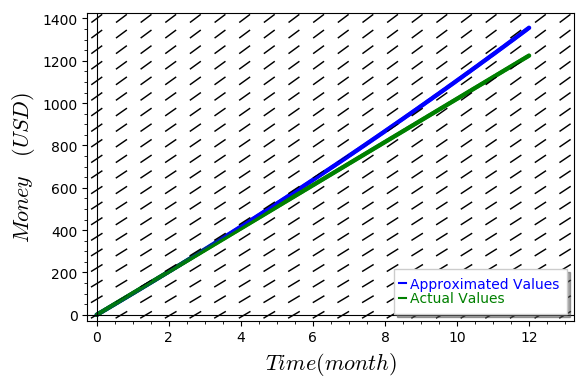

In [9]:
from sage.plot.line import Line

# Graph the slope field for the function
g_plot = plot_slope_field(m, (t, 0, 13), (y, 0, 1400), axes_labels = ["$Time(month)$","$Money\quad(USD)$"])
line = line2d(points, legend_label='Approximated Values', legend_color = 'blue', thickness=1.5)
line_t = line2d(t_points, color = 'green', legend_label='Actual Values', legend_color = 'green', thickness=1.5)
line.set_legend_options(loc = 'lower right')

# Plot the points obtained from algorithm
(g_plot + point(points,size=10) + point(t_points, color = "green", size=10) + line + line_t)

In [10]:
# Calculate the error
errors = []
r_errors = []

for i in range(len(points)):
    error = points[i][1] - t_points[i][1]
    r_error = error/points[i][1]
    errors.append(error)
    r_errors.append(r_error)

print "\nerror of last value:", errors[-1]
print "\nrelative error of last value:", r_errors[-1]


error of last value: 131.323125911863

relative error of last value: 0.0968642174517579
